In [109]:
df['Month']=df.Date.dt.month.astype(str)
df['Year']=df.Date.dt.year.astype(str)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version

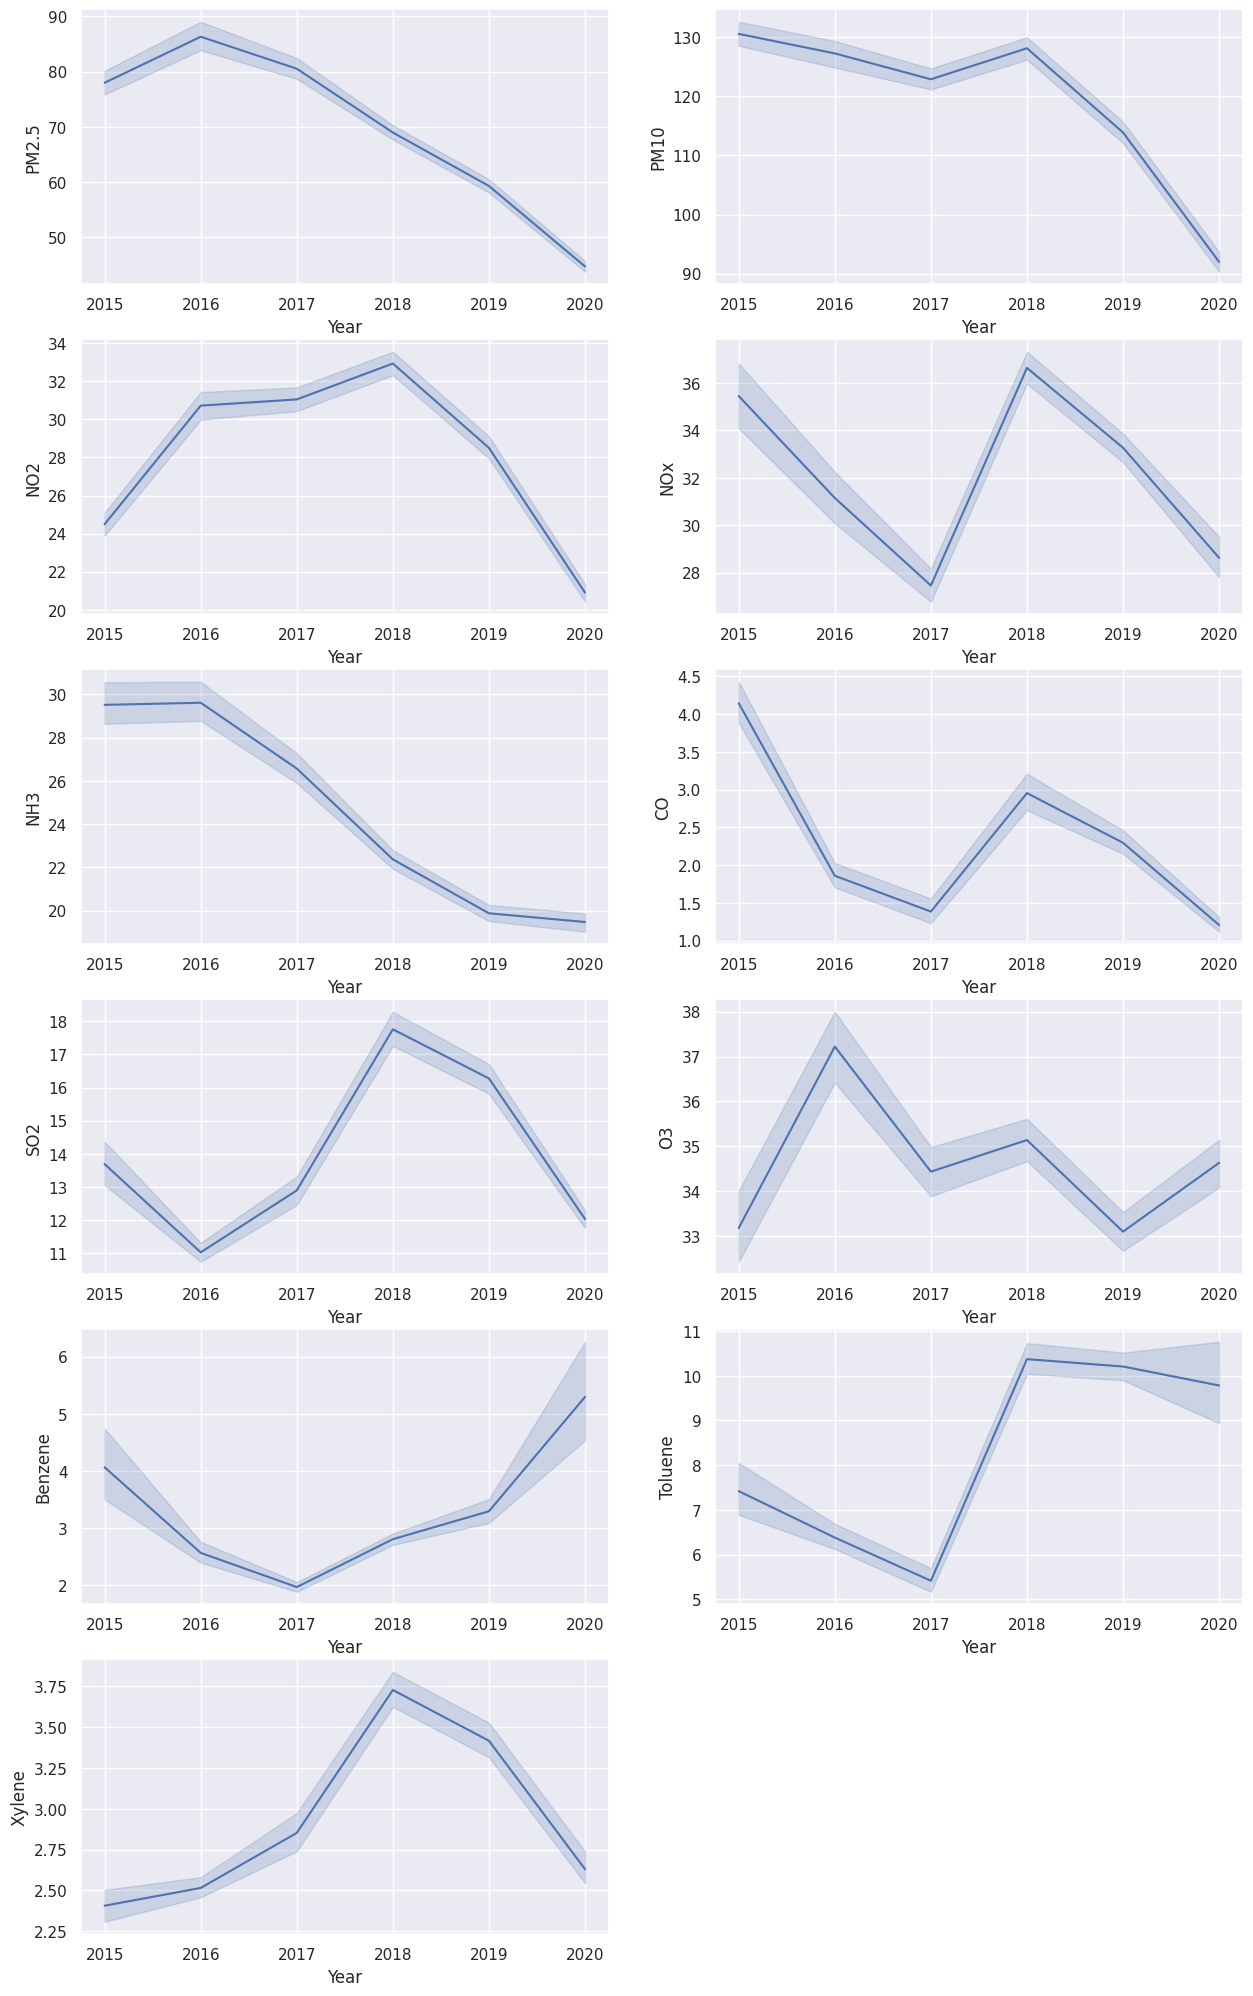

In [110]:
cols=['PM2.5','PM10','NO2','NOx','NH3',
      'CO','SO2','O3','Benzene','Toluene','Xylene']

x=df.iloc[:,2:]
fig=plt.figure(figsize=(15,25))
for i,col  in enumerate(cols):
    fig.add_subplot(6,2,i+1)
    sns.lineplot(x='Year',y=col,data=x)

### Here I divide the data set into two part namely Vehicular Pollution content (PM2.5, PM10, NO2, NH3, CO,) and Industrial Pollution content (CO, SO2, O3, Benzene, Toluene, Xylene) and find how these contents correlated with AQI (air quality index)

In [111]:
df2 = df.copy()
df2['Vehicular_Pollution_content'] = df2['PM2.5']+df2['PM10']+df2['NO']+df2['NO2']+df2['NOx']+df2['NH3']+df2['CO']
df2['Industrial_Pollution_content'] = df2['SO2']+df2['O3']+df2['Benzene']+df2['Toluene']+df2['Xylene']
df2 = df2.drop(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3','Benzene','Toluene','Xylene'],axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   City                          29531 non-null  object        
 1   Date                          29531 non-null  datetime64[ns]
 2   AQI                           29531 non-null  float64       
 3   Air_quality                   29531 non-null  object        
 4   Month                         29531 non-null  object        
 5   Year                          29531 non-null  object        
 6   Vehicular_Pollution_content   29531 non-null  float64       
 7   Industrial_Pollution_content  29531 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 1.8+ MB


In [112]:

import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
from sklearn.model_selection import train_test_split
from sklearn import metrics
from math import sqrt
import requests
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
def ploting(var):
    df2[var].iplot(title=var,xTitle='Cities',yTitle=var, linecolor='black',)
    plt.show()
ploting('Vehicular_Pollution_content')
ploting('Industrial_Pollution_content')

In [129]:
def max_bar_plot(var):
    x1 = df2[['City',var]].groupby(["City"]).median().sort_values(by = var,
    ascending = True).tail(10).iplot(kind='bar', xTitle='Cities',yTitle=var, 
                                     linecolor='black', title='{2} {1} {0}'.format(")",var,'Most polluted cities('))

p1 = max_bar_plot('Industrial_Pollution_content')
p2 = max_bar_plot('Vehicular_Pollution_content')

In [130]:
def min_bar_plot(var):
    x1 = df2[['City',var]].groupby(["City"]).mean().sort_values(by = var,
    ascending = True).head(10).iplot(kind='bar', xTitle='Cities',yTitle=var, linecolor='black',title='{2} {1} {0}'.format(")",var,' Minimum polluted cities('))
p1 = min_bar_plot('Industrial_Pollution_content')
p2 = min_bar_plot('Vehicular_Pollution_content')

In [ ]:
df[['City','AQI']].groupby('City').mean().sort_values('AQI').plot(kind='bar',cmap='Blues_r',figsize=(8,8))
plt.title('Average AQI in last 5 years');

# From above heatmap we observe a strong correlation of NO with NOx and of Benzene with Toluene so lets visualize them with the help of scatterplots

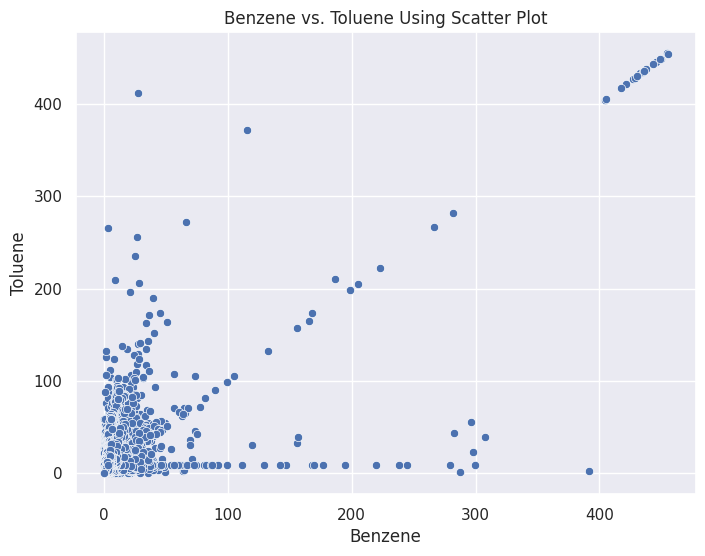

In [117]:
### From above heatmap we observe a strong correlation of NO with NOx and of Benzene with Toluene so lets visualize them with the help of scatterplots¶

sns.set(rc={'figure.figsize': (8, 6)})
# plt.figure(figsize=(12, 6))
plt.figure(figsize=(8, 6))
sns.scatterplot(x='NO', y='NOx', data=df)
plt.title('NO vs. NOx Using Scatter Plot')
plt.show()

sns.scatterplot(x='Benzene', y='Toluene', data=df)
plt.title('Benzene vs. Toluene Using Scatter Plot')
plt.show()